# Arsal Ali
## Football/Scocer Match Prediction Model and EDA

In [417]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3
import os
import re

### Connecting to DataBase and importing DataSets

In [418]:
conn = sqlite3.connect('database.sqlite')

country_df = pd.read_sql_query("SELECT * FROM Country", conn)
league_df = pd.read_sql_query("SELECT * FROM League", conn)
team_df = pd.read_sql_query("SELECT * FROM Team", conn)
match_df = pd.read_sql_query("SELECT * FROM Match", conn)
player_df = pd.read_sql_query("SELECT * FROM Player", conn)
player_attr_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
team_attr_df = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)

In [419]:
tables = {
    "Country": country_df,
    "League":league_df,
    "Team": team_df,
    "Match": match_df,
    "Player": player_df,
    "Player_Attributes": player_attr_df,
    "Team_Attributes": team_attr_df ,
}

for table_name, df in tables.items():
    print(f"\n {table_name} Columns ({len(df.columns)} total):")
    for col in df.columns:
        print(f"  - {col}")


 Country Columns (2 total):
  - id
  - name

 League Columns (3 total):
  - id
  - country_id
  - name

 Team Columns (5 total):
  - id
  - team_api_id
  - team_fifa_api_id
  - team_long_name
  - team_short_name

 Match Columns (115 total):
  - id
  - country_id
  - league_id
  - season
  - stage
  - date
  - match_api_id
  - home_team_api_id
  - away_team_api_id
  - home_team_goal
  - away_team_goal
  - home_player_X1
  - home_player_X2
  - home_player_X3
  - home_player_X4
  - home_player_X5
  - home_player_X6
  - home_player_X7
  - home_player_X8
  - home_player_X9
  - home_player_X10
  - home_player_X11
  - away_player_X1
  - away_player_X2
  - away_player_X3
  - away_player_X4
  - away_player_X5
  - away_player_X6
  - away_player_X7
  - away_player_X8
  - away_player_X9
  - away_player_X10
  - away_player_X11
  - home_player_Y1
  - home_player_Y2
  - home_player_Y3
  - home_player_Y4
  - home_player_Y5
  - home_player_Y6
  - home_player_Y7
  - home_player_Y8
  - home_player_Y9
  

### Checking for Null Values

In [420]:
null_counts = match_df.isnull().sum()  

missing_values_df = pd.DataFrame({
    "Column": match_df .columns,
    "NaN Count": null_counts.values,
})

print(missing_values_df)

         Column  NaN Count
0            id          0
1    country_id          0
2     league_id          0
3        season          0
4         stage          0
..          ...        ...
110         GBD      11817
111         GBA      11817
112         BSH      11818
113         BSD      11818
114         BSA      11818

[115 rows x 2 columns]


In [421]:
counts = match_df.notnull().sum()  
counts

id            25979
country_id    25979
league_id     25979
season        25979
stage         25979
              ...  
GBD           14162
GBA           14162
BSH           14161
BSD           14161
BSA           14161
Length: 115, dtype: int64

In [422]:
print(missing_values_df.loc[77:115,:])

         Column  NaN Count
77         goal      11762
78       shoton      11762
79      shotoff      11762
80   foulcommit      11762
81         card      11762
82        cross      11762
83       corner      11762
84   possession      11762
85        B365H       3387
86        B365D       3387
87        B365A       3387
88          BWH       3404
89          BWD       3404
90          BWA       3404
91          IWH       3459
92          IWD       3459
93          IWA       3459
94          LBH       3423
95          LBD       3423
96          LBA       3423
97          PSH      14811
98          PSD      14811
99          PSA      14811
100         WHH       3408
101         WHD       3408
102         WHA       3408
103         SJH       8882
104         SJD       8882
105         SJA       8882
106         VCH       3411
107         VCD       3411
108         VCA       3411
109         GBH      11817
110         GBD      11817
111         GBA      11817
112         BSH      11818
1

In [423]:
match_df.shape

(25979, 115)

In [424]:
null_counts = player_df.isnull().sum() 

missing_values_df = pd.DataFrame({
    "Column": player_df  .columns,
    "NaN Count": null_counts.values,
})

print(missing_values_df)

               Column  NaN Count
0                  id          0
1       player_api_id          0
2         player_name          0
3  player_fifa_api_id          0
4            birthday          0
5              height          0
6              weight          0


In [425]:
null_counts = team_attr_df .isnull().sum()  

missing_values_df = pd.DataFrame({
    "Column": team_attr_df .columns,
    "NaN Count": null_counts.values,
})

print(missing_values_df)

                            Column  NaN Count
0                               id          0
1                 team_fifa_api_id          0
2                      team_api_id          0
3                             date          0
4                 buildUpPlaySpeed          0
5            buildUpPlaySpeedClass          0
6             buildUpPlayDribbling        969
7        buildUpPlayDribblingClass          0
8               buildUpPlayPassing          0
9          buildUpPlayPassingClass          0
10     buildUpPlayPositioningClass          0
11           chanceCreationPassing          0
12      chanceCreationPassingClass          0
13          chanceCreationCrossing          0
14     chanceCreationCrossingClass          0
15          chanceCreationShooting          0
16     chanceCreationShootingClass          0
17  chanceCreationPositioningClass          0
18                 defencePressure          0
19            defencePressureClass          0
20               defenceAggression

In [426]:
null_counts = league_df .isnull().sum()

missing_values_df = pd.DataFrame({
    "Column": league_df   .columns,
    "NaN Count": null_counts.values,
})

print(missing_values_df)

       Column  NaN Count
0          id          0
1  country_id          0
2        name          0


In [427]:
null_counts = team_df .isnull().sum()

missing_values_df = pd.DataFrame({
    "Column": team_df   .columns,
    "NaN Count": null_counts.values,
})

print(missing_values_df)

             Column  NaN Count
0                id          0
1       team_api_id          0
2  team_fifa_api_id         11
3    team_long_name          0
4   team_short_name          0


### Triming and Merging the Dataset

In [428]:
columns_to_drop = [
    'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5',
    'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 
    'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 
    'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 
    'away_player_X10', 'away_player_X11','home_player_1', 'home_player_2', 'home_player_3', 
    'home_player_4', 'home_player_5','home_player_6', 'home_player_7', 'home_player_8', 
    'home_player_9', 'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2', 
    'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 
    'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11', 'home_player_Y1', 
    'home_player_Y2','home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
    'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
    'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
    'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
    'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11',
    "goal","B365H","corner","cross","foulcommit", "shotoff",
    'B365H', 'B365D','B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH',
    'LBD', 'LBA','PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 
    'VCH','VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'
]

match_df = match_df.drop(columns=columns_to_drop, errors='ignore')

print(match_df.columns) 

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'shoton', 'card', 'possession'],
      dtype='object')


In [429]:
match_df.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'shoton', 'card', 'possession'],
      dtype='object')

In [430]:
null_counts = match_df.isnull().sum()  
null_counts

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
shoton              11762
card                11762
possession          11762
dtype: int64

In [431]:
match_df['card'].dtype

dtype('O')

In [432]:
match_df["card"].unique()

array([None,
       '<card><value><comment>y</comment><stats><ycards>1</ycards></stats><event_incident_typefk>73</event_incident_typefk><elapsed>78</elapsed><card_type>y</card_type><subtype>serious_fouls</subtype><player1>24157</player1><sortorder>1</sortorder><team>10260</team><n>342</n><type>card</type><id>379481</id></value><value><comment>y</comment><stats><ycards>1</ycards></stats><event_incident_typefk>73</event_incident_typefk><elapsed>82</elapsed><card_type>y</card_type><subtype>serious_fouls</subtype><player1>30362</player1><sortorder>1</sortorder><team>10260</team><n>346</n><type>card</type><id>379503</id></value><value><comment>y</comment><stats><ycards>1</ycards></stats><event_incident_typefk>70</event_incident_typefk><elapsed>90</elapsed><card_type>y</card_type><player1>30829</player1><sortorder>1</sortorder><team>10260</team><n>353</n><type>card</type><id>379547</id></value></card>',
       '<card />', ...,
       '<card><value><comment>y</comment><stats><ycards>1</ycards

In [433]:
def extract_card_types(xml_string, home_team_id, away_team_id):
    if pd.isna(xml_string) or xml_string.strip() in ["<card />", ""]:
        return None 

    card_entries = re.findall(r"<value>.*?</value>", xml_string)
    yellow_home = yellow_away = red_home = red_away = 0

    for entry in card_entries:
        team_match = re.search(r"<team>(\d+)</team>", entry)
        if not team_match:
            continue
        team_id = int(team_match.group(1))

        card_type_match = re.search(r"<card_type>(y|r)</card_type>", entry)
        if not card_type_match:
            continue

        card_type = card_type_match.group(1)
        if team_id == home_team_id:
            yellow_home += (card_type == "y")
            red_home += (card_type == "r")
        elif team_id == away_team_id:
            yellow_away += (card_type == "y")
            red_away += (card_type == "r")

    return yellow_home, red_home, yellow_away, red_away

match_df["card_counts"] = match_df.apply(
    lambda row: extract_card_types(row["card"], row["home_team_api_id"], row["away_team_api_id"]), axis=1
)
match_df = match_df.dropna(subset=["card_counts"])
match_df[["yellow_home", "red_home", "yellow_away", "red_away"]] = match_df["card_counts"].apply(pd.Series)
match_df.drop(columns=["card_counts"], inplace=True) 

match_df.head()  

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,shoton,card,possession,yellow_home,red_home,yellow_away,red_away
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,<shoton><value><stats><blocked>1</blocked></st...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>56</comment><event...,3,0,0,0
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,<shoton><value><stats><blocked>1</blocked></st...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>45</comment><event...,0,0,2,0
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,<shoton><value><stats><shoton>1</shoton></stat...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>50</comment><event...,2,0,1,0
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,<shoton><value><stats><blocked>1</blocked></st...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>51</comment><event...,0,0,1,0
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,3,<shoton><value><stats><shoton>1</shoton></stat...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>46</comment><event...,2,0,2,0


In [434]:
match_df.loc[1728,'possession']

'<possession><value><comment>56</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>44</awaypos><homepos>56</homepos><n>68</n><type>special</type><id>379029</id></value><value><comment>54</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>4</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>117</n><type>special</type><id>379251</id></value><value><comment>54</comment><event_incident_typefk>352</event_incident_typefk><elapsed>70</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>190</n><type>special</type><id>379443</id></value><value><comment>55</comment><elapsed_plus>5</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>45</awaypos><homepos>55</h

In [435]:
match_df.shape

(13776, 18)

In [436]:
match_df.loc[1728,'shoton']

'<shoton><value><stats><blocked>1</blocked></stats><event_incident_typefk>61</event_incident_typefk><elapsed>3</elapsed><subtype>blocked_shot</subtype><player1>24154</player1><sortorder>0</sortorder><team>10260</team><n>253</n><type>shoton</type><id>378828</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>154</event_incident_typefk><elapsed>7</elapsed><subtype>header</subtype><player1>24157</player1><sortorder>2</sortorder><team>10260</team><n>258</n><type>shoton</type><id>378866</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>153</event_incident_typefk><elapsed>14</elapsed><subtype>shot</subtype><player1>30829</player1><sortorder>1</sortorder><team>10260</team><n>274</n><type>shoton</type><id>378922</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>153</event_incident_typefk><elapsed>14</elapsed><subtype>shot</subtype><player1>30373</player1><sortorder>2</sortorder><team>10260</team><n>279</n><type>shoton</ty

In [437]:
def extract_latest_possession(xml_string):
    if pd.isna(xml_string) or xml_string.strip() in ["<possession />", ""]:
        return None
    
    possession_entries = re.findall(r"<value>.*?</value>", xml_string)
    if not possession_entries:
        return None
    
    latest_entry = possession_entries[-1]
    
    homepos_match = re.search(r"<homepos>(\d+)</homepos>", latest_entry)
    homepos = int(homepos_match.group(1)) if homepos_match else None

    awaypos_match = re.search(r"<awaypos>(\d+)</awaypos>", latest_entry)
    awaypos = int(awaypos_match.group(1)) if awaypos_match else None

    return homepos, awaypos

match_df["possession_counts"] = match_df["possession"].apply(extract_latest_possession)
match_df = match_df.dropna(subset=["possession_counts"])
match_df[["home_possession", "away_possession"]] = match_df["possession_counts"].apply(pd.Series)
match_df.drop(columns=["possession_counts"], inplace=True)
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,shoton,card,possession,yellow_home,red_home,yellow_away,red_away,home_possession,away_possession
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,<shoton><value><stats><blocked>1</blocked></st...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>56</comment><event...,3,0,0,0,55.0,45.0
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,<shoton><value><stats><blocked>1</blocked></st...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>45</comment><event...,0,0,2,0,46.0,54.0
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,<shoton><value><stats><shoton>1</shoton></stat...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>50</comment><event...,2,0,1,0,52.0,48.0
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,<shoton><value><stats><blocked>1</blocked></st...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>51</comment><event...,0,0,1,0,52.0,48.0
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,3,<shoton><value><stats><shoton>1</shoton></stat...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>46</comment><event...,2,0,2,0,51.0,49.0


In [438]:
match_df.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'shoton', 'card', 'possession',
       'yellow_home', 'red_home', 'yellow_away', 'red_away', 'home_possession',
       'away_possession'],
      dtype='object')

In [439]:
match_df.iloc[:, 2:12].head(8)

,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,shoton
1728,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,<shoton><value><stats><blocked>1</blocked></st...
1730,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,<shoton><value><stats><blocked>1</blocked></st...
1731,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,<shoton><value><stats><shoton>1</shoton></stat...
1732,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,<shoton><value><stats><blocked>1</blocked></st...
1733,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,3,<shoton><value><stats><shoton>1</shoton></stat...
1734,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,1,<shoton><value><stats><shoton>1</shoton></stat...
1735,1729,2008/2009,1,2008-08-16 00:00:00,489049,8559,10194,3,1,<shoton><value><stats><blocked>1</blocked></st...
1736,1729,2008/2009,1,2008-08-16 00:00:00,489050,8667,9879,2,1,<shoton><value><stats><shoton>1</shoton></stat...


In [440]:
def extract_shoton_counts(xml_string, home_team_id, away_team_id):
    if pd.isna(xml_string) or xml_string.strip() in ["<shoton />", ""]:
        return 0, 0

    root = ET.fromstring(xml_string)

    home_shots = 0
    away_shots = 0

    for value in root.findall("value"):
        team_element = value.find("team")
        shoton_element = value.find(".//stats/shoton")
        
        if team_element is not None and shoton_element is not None:
            team_id = int(team_element.text)
            
            if team_id == home_team_id:
                home_shots += 1
            elif team_id == away_team_id:
                away_shots += 1
    
    return home_shots, away_shots

match_df["shoton_counts"] = match_df.apply(
    lambda row: extract_shoton_counts(row["shoton"], row["home_team_api_id"], row["away_team_api_id"]),
    axis=1
)

match_df[["home_shoton", "away_shoton"]] = match_df["shoton_counts"].apply(pd.Series)

In [441]:
match_df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,possession,yellow_home,red_home,yellow_away,red_away,home_possession,away_possession,shoton_counts,home_shoton,away_shoton
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,<possession><value><comment>56</comment><event...,3,0,0,0,55.0,45.0,"(6, 1)",6,1
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,<possession><value><comment>45</comment><event...,0,0,2,0,46.0,54.0,"(3, 2)",3,2
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,<possession><value><comment>50</comment><event...,2,0,1,0,52.0,48.0,"(4, 2)",4,2
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,<possession><value><comment>51</comment><event...,0,0,1,0,52.0,48.0,"(3, 6)",3,6
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,<possession><value><comment>46</comment><event...,2,0,2,0,51.0,49.0,"(1, 4)",1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,<possession><value><comment>49</comment><stats...,4,0,4,0,49.0,51.0,"(6, 1)",6,1
24553,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,<possession><value><comment>53</comment><stats...,0,0,1,0,50.0,50.0,"(2, 1)",2,1
24554,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,<possession><value><comment>49</comment><stats...,1,0,3,0,52.0,48.0,"(3, 0)",3,0
24555,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,<possession><value><comment>50</comment><stats...,3,0,3,0,45.0,55.0,"(7, 3)",7,3


In [442]:
match_df.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'shoton', 'card', 'possession',
       'yellow_home', 'red_home', 'yellow_away', 'red_away', 'home_possession',
       'away_possession', 'shoton_counts', 'home_shoton', 'away_shoton'],
      dtype='object')

In [443]:
selected_attributes = [
    'team_api_id', 'date', 
    'buildUpPlaySpeed', 'buildUpPlayPassing',
    'chanceCreationShooting', 'chanceCreationCrossing',
    'defencePressure', 'defenceAggression'
]

team_attr_df = team_attr_df[selected_attributes]

team_attr_df = team_attr_df.sort_values(by=['team_api_id', 'date']).groupby('team_api_id').last().reset_index()

match_df = match_df.merge(
    team_attr_df,
    left_on='home_team_api_id', 
    right_on='team_api_id', 
    how='left'
)

match_df.rename(
    columns={
        'buildUpPlaySpeed': 'home_buildUpPlaySpeed',
        'buildUpPlayPassing': 'home_buildUpPlayPassing',
        'chanceCreationShooting': 'home_chanceCreationShooting',
        'chanceCreationCrossing': 'home_chanceCreationCrossing',
        'defencePressure': 'home_defencePressure',
        'defenceAggression': 'home_defenceAggression'
    },
    inplace=True
)

match_df.drop(columns=['team_api_id'], inplace=True)

match_df = match_df.merge(
    team_attr_df,
    left_on='away_team_api_id', 
    right_on='team_api_id', 
    how='left'
)

match_df.rename(
    columns={
        'buildUpPlaySpeed': 'away_buildUpPlaySpeed',
        'buildUpPlayPassing': 'away_buildUpPlayPassing',
        'chanceCreationShooting': 'away_chanceCreationShooting',
        'chanceCreationCrossing': 'away_chanceCreationCrossing',
        'defencePressure': 'away_defencePressure',
        'defenceAggression': 'away_defenceAggression'
    },
    inplace=True
)

match_df.drop(columns=['team_api_id'], inplace=True)

In [444]:
match_df

,id,country_id,league_id,season,stage,date_x,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,home_chanceCreationCrossing,home_defencePressure,home_defenceAggression,date,away_buildUpPlaySpeed,away_buildUpPlayPassing,away_chanceCreationShooting,away_chanceCreationCrossing,away_defencePressure,away_defenceAggression
0,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,44,54,53,2015-09-10 00:00:00,58,49,46,54,41,39
1,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,50,47,45,2015-09-10 00:00:00,66,45,46,34,51,52
2,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,73,30,37,2015-09-10 00:00:00,51,56,40,59,62,48
3,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,48,35,44,2015-09-10 00:00:00,59,29,24,36,48,47
4,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,33,52,58,2015-09-10 00:00:00,60,65,42,58,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,62,49,42,2015-09-10 00:00:00,35,35,58,51,49,45
8120,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,40,47,37,2015-09-10 00:00:00,53,47,55,52,45,50
8121,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,60,49,57,2015-09-10 00:00:00,55,50,38,59,45,54
8122,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,63,48,45,2015-09-10 00:00:00,59,37,53,43,58,49


In [445]:
match_df.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date_x',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'shoton', 'card', 'possession',
       'yellow_home', 'red_home', 'yellow_away', 'red_away', 'home_possession',
       'away_possession', 'shoton_counts', 'home_shoton', 'away_shoton',
       'date_y', 'home_buildUpPlaySpeed', 'home_buildUpPlayPassing',
       'home_chanceCreationShooting', 'home_chanceCreationCrossing',
       'home_defencePressure', 'home_defenceAggression', 'date',
       'away_buildUpPlaySpeed', 'away_buildUpPlayPassing',
       'away_chanceCreationShooting', 'away_chanceCreationCrossing',
       'away_defencePressure', 'away_defenceAggression'],
      dtype='object')

In [446]:
columns_to_drop = [
    'id', 'country_id', 'league_id', 'season', 'stage', 'date',
    'match_api_id', 'home_team_api_id', 'away_team_api_id', 'shoton', 
    'card', 'possession', 'shoton_counts','date_x','date_y'
]

match_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [447]:
match_df.columns

Index(['home_team_goal', 'away_team_goal', 'yellow_home', 'red_home',
       'yellow_away', 'red_away', 'home_possession', 'away_possession',
       'home_shoton', 'away_shoton', 'home_buildUpPlaySpeed',
       'home_buildUpPlayPassing', 'home_chanceCreationShooting',
       'home_chanceCreationCrossing', 'home_defencePressure',
       'home_defenceAggression', 'away_buildUpPlaySpeed',
       'away_buildUpPlayPassing', 'away_chanceCreationShooting',
       'away_chanceCreationCrossing', 'away_defencePressure',
       'away_defenceAggression'],
      dtype='object')

In [448]:
match_df['Outcome'] = np.where(
    match_df['home_team_goal'] > match_df['away_team_goal'], '1',        #  1 == win for home team
    np.where(match_df['home_team_goal'] < match_df['away_team_goal'], '2', '0')        # 2== loss for home team   ,0== draw
)

In [449]:
match_df

,home_team_goal,away_team_goal,yellow_home,red_home,yellow_away,red_away,home_possession,away_possession,home_shoton,away_shoton,...,home_chanceCreationCrossing,home_defencePressure,home_defenceAggression,away_buildUpPlaySpeed,away_buildUpPlayPassing,away_chanceCreationShooting,away_chanceCreationCrossing,away_defencePressure,away_defenceAggression,Outcome
0,1,1,3,0,0,0,55.0,45.0,6,1,...,44,54,53,58,49,46,54,41,39,0
1,0,1,0,0,2,0,46.0,54.0,3,2,...,50,47,45,66,45,46,34,51,52,2
2,2,1,2,0,1,0,52.0,48.0,4,2,...,73,30,37,51,56,40,59,62,48,1
3,4,2,0,0,1,0,52.0,48.0,3,6,...,48,35,44,59,29,24,36,48,47,1
4,2,3,2,0,2,0,51.0,49.0,1,4,...,33,52,58,60,65,42,58,50,50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,1,4,0,4,0,49.0,51.0,6,1,...,62,49,42,35,35,58,51,49,45,1
8120,2,0,0,0,1,0,50.0,50.0,2,1,...,40,47,37,53,47,55,52,45,50,1
8121,3,0,1,0,3,0,52.0,48.0,3,0,...,60,49,57,55,50,38,59,45,54,1
8122,1,1,3,0,3,0,45.0,55.0,7,3,...,63,48,45,59,37,53,43,58,49,0


In [450]:
columns_to_drop = [
    'home_team_goal','away_team_goal'
]

match_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [451]:
match_df.columns

Index(['yellow_home', 'red_home', 'yellow_away', 'red_away', 'home_possession',
       'away_possession', 'home_shoton', 'away_shoton',
       'home_buildUpPlaySpeed', 'home_buildUpPlayPassing',
       'home_chanceCreationShooting', 'home_chanceCreationCrossing',
       'home_defencePressure', 'home_defenceAggression',
       'away_buildUpPlaySpeed', 'away_buildUpPlayPassing',
       'away_chanceCreationShooting', 'away_chanceCreationCrossing',
       'away_defencePressure', 'away_defenceAggression', 'Outcome'],
      dtype='object')

In [452]:
print(match_df['Outcome'].unique())

['0' '2' '1']


### Starting EDA

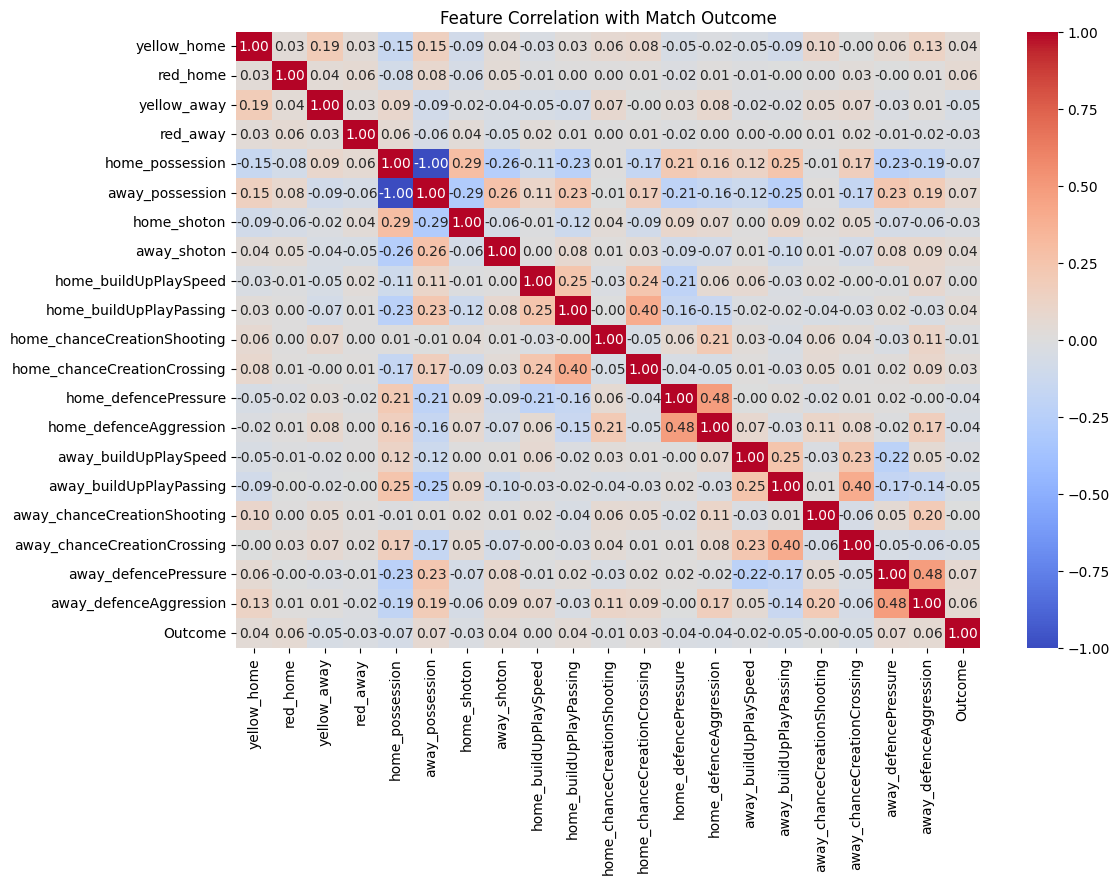

In [453]:
match_encoded_df = match_df.copy() 

plt.figure(figsize=(12, 8))
sns.heatmap(match_encoded_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Match Outcome")
plt.show()

In [454]:
match_encoded_df

,yellow_home,red_home,yellow_away,red_away,home_possession,away_possession,home_shoton,away_shoton,home_buildUpPlaySpeed,home_buildUpPlayPassing,...,home_chanceCreationCrossing,home_defencePressure,home_defenceAggression,away_buildUpPlaySpeed,away_buildUpPlayPassing,away_chanceCreationShooting,away_chanceCreationCrossing,away_defencePressure,away_defenceAggression,Outcome
0,3,0,0,0,55.0,45.0,6,1,38,44,...,44,54,53,58,49,46,54,41,39,0
1,0,0,2,0,46.0,54.0,3,2,43,51,...,50,47,45,66,45,46,34,51,52,2
2,2,0,1,0,52.0,48.0,4,2,77,57,...,73,30,37,51,56,40,59,62,48,1
3,0,0,1,0,52.0,48.0,3,6,63,54,...,48,35,44,59,29,24,36,48,47,1
4,2,0,2,0,51.0,49.0,1,4,43,40,...,33,52,58,60,65,42,58,50,50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,0,4,0,49.0,51.0,6,1,57,50,...,62,49,42,35,35,58,51,49,45,1
8120,0,0,1,0,50.0,50.0,2,1,42,36,...,40,47,37,53,47,55,52,45,50,1
8121,1,0,3,0,52.0,48.0,3,0,46,39,...,60,49,57,55,50,38,59,45,54,1
8122,3,0,3,0,45.0,55.0,7,3,57,59,...,63,48,45,59,37,53,43,58,49,0


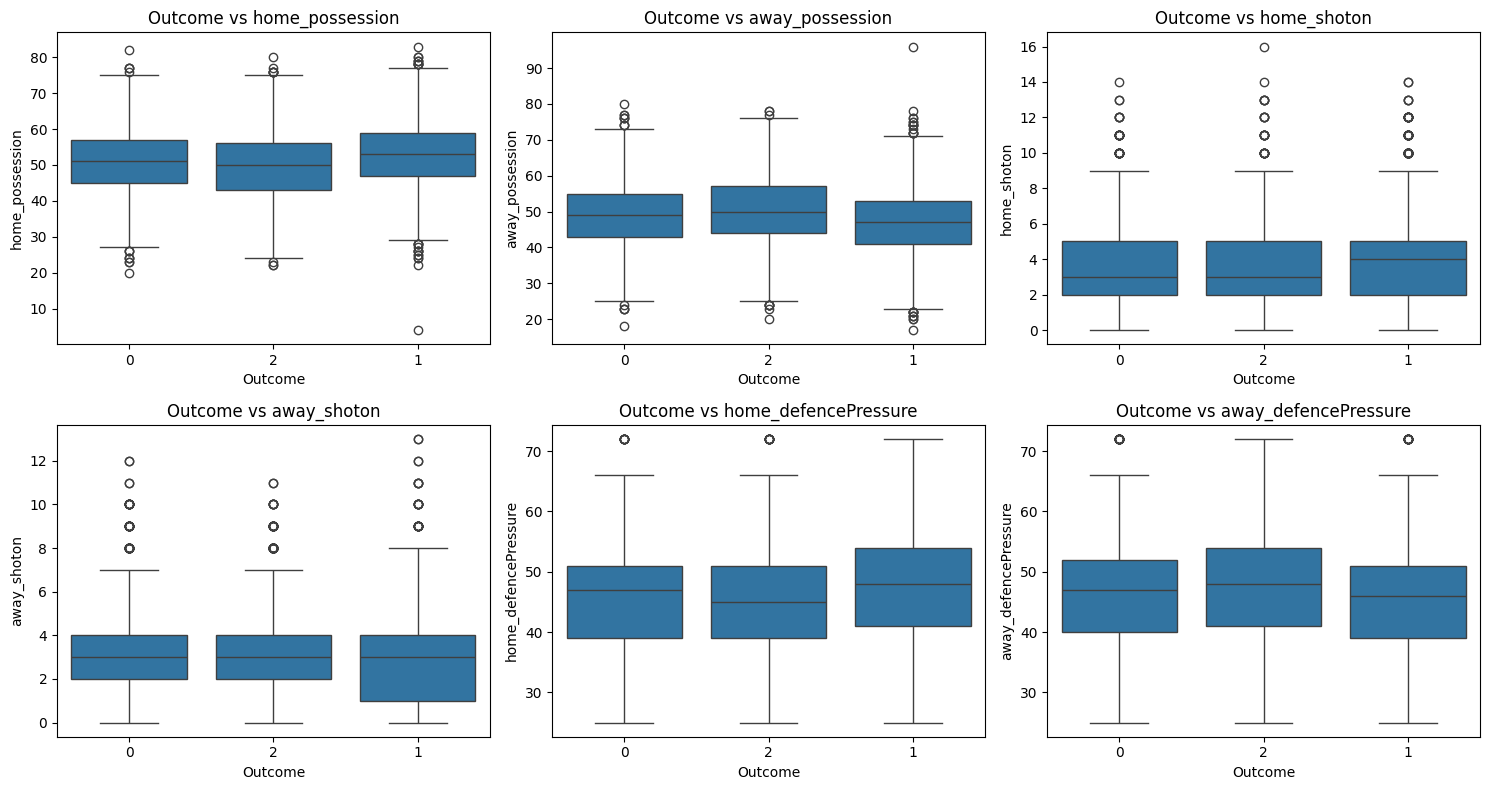

In [455]:
features = ['home_possession', 'away_possession', 'home_shoton', 'away_shoton', 'home_defencePressure', 'away_defencePressure']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Outcome', y=feature, data=match_encoded_df)
    plt.title(f"Outcome vs {feature}")
plt.tight_layout()
plt.show()

In [456]:
performance_metrics = match_df.groupby("Outcome").agg({
    "home_shoton": "mean",
    "away_shoton": "mean",
    "home_possession": "mean",
    "away_possession": "mean"
}).reset_index()

performance_metrics.rename(columns={
    "home_shoton": "Avg_Home_ShotsOn",
    "away_shoton": "Avg_Away_ShotsOn",
    "home_possession": "Avg_Home_Possession",
    "away_possession": "Avg_Away_Possession"
}, inplace=True)

print(performance_metrics)

  Outcome  Avg_Home_ShotsOn  Avg_Away_ShotsOn  Avg_Home_Possession  \
0       0          3.646543          3.012171            51.166991   
1       1          3.939840          2.859626            52.848088   
2       2          3.476824          3.232189            49.562661   

   Avg_Away_Possession  
0            48.833009  
1            47.151912  
2            50.437339  


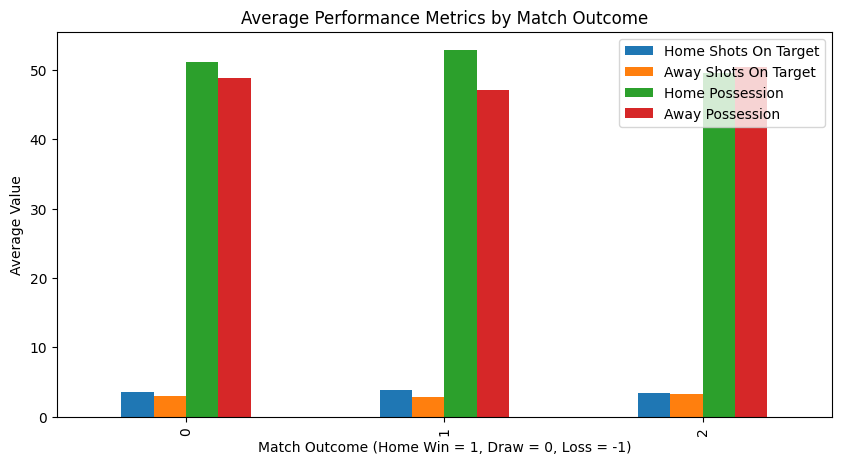

In [457]:
performance_metrics.set_index("Outcome").plot(kind="bar", figsize=(10, 5))
plt.title("Average Performance Metrics by Match Outcome")
plt.xlabel("Match Outcome (Home Win = 1, Draw = 0, Loss = -1)")
plt.ylabel("Average Value")
plt.legend(["Home Shots On Target", "Away Shots On Target", "Home Possession", "Away Possession"])
plt.show()

Outliers detected in each metric:
 yellow_home                     81
red_home                       442
yellow_away                     38
red_away                       490
home_possession                 13
away_possession                 13
home_shoton                     77
away_shoton                     93
home_buildUpPlaySpeed            0
home_buildUpPlayPassing          0
home_chanceCreationShooting      0
home_chanceCreationCrossing      0
home_defencePressure             0
home_defenceAggression           0
away_buildUpPlaySpeed            0
away_buildUpPlayPassing          0
away_chanceCreationShooting      0
away_chanceCreationCrossing      0
away_defencePressure             0
away_defenceAggression           0
dtype: int64
Original dataset size: (8124, 21)
Cleaned dataset size: (6992, 21)


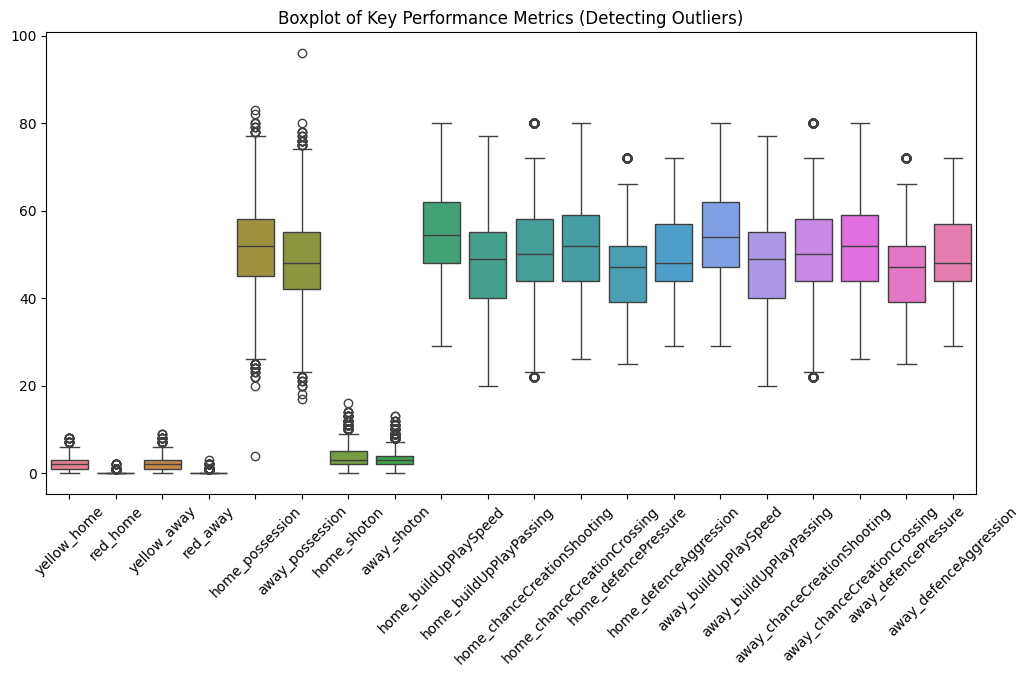

In [458]:
metrics = [
    'yellow_home', 'red_home', 'yellow_away', 'red_away', 'home_possession',
       'away_possession', 'home_shoton', 'away_shoton',
       'home_buildUpPlaySpeed', 'home_buildUpPlayPassing',
       'home_chanceCreationShooting', 'home_chanceCreationCrossing',
       'home_defencePressure', 'home_defenceAggression',
       'away_buildUpPlaySpeed', 'away_buildUpPlayPassing',
       'away_chanceCreationShooting', 'away_chanceCreationCrossing',
       'away_defencePressure', 'away_defenceAggression'
]

z_scores = np.abs((match_encoded_df[metrics] - match_encoded_df[metrics].mean()) / match_encoded_df[metrics].std())

outliers = (z_scores > 3).sum()

print("Outliers detected in each metric:\n", outliers)

match_df_cleaned = match_encoded_df[(z_scores < 3).all(axis=1)]

print("Original dataset size:", match_encoded_df.shape)
print("Cleaned dataset size:", match_df_cleaned.shape)

plt.figure(figsize=(12, 6))
sns.boxplot(data=match_encoded_df[metrics])
plt.xticks(rotation=45)
plt.title("Boxplot of Key Performance Metrics (Detecting Outliers)")
plt.show()

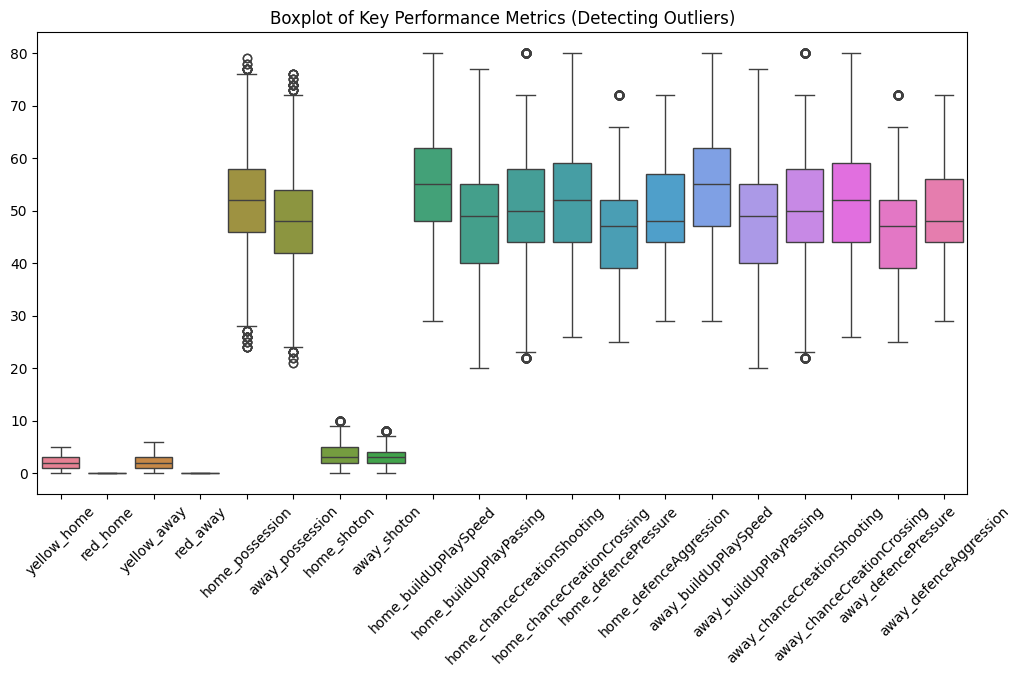

In [459]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=match_df_cleaned[metrics])
plt.xticks(rotation=45)
plt.title("Boxplot of Key Performance Metrics (Detecting Outliers)")
plt.show()

In [460]:
match_df_cleaned

,yellow_home,red_home,yellow_away,red_away,home_possession,away_possession,home_shoton,away_shoton,home_buildUpPlaySpeed,home_buildUpPlayPassing,...,home_chanceCreationCrossing,home_defencePressure,home_defenceAggression,away_buildUpPlaySpeed,away_buildUpPlayPassing,away_chanceCreationShooting,away_chanceCreationCrossing,away_defencePressure,away_defenceAggression,Outcome
0,3,0,0,0,55.0,45.0,6,1,38,44,...,44,54,53,58,49,46,54,41,39,0
1,0,0,2,0,46.0,54.0,3,2,43,51,...,50,47,45,66,45,46,34,51,52,2
2,2,0,1,0,52.0,48.0,4,2,77,57,...,73,30,37,51,56,40,59,62,48,1
3,0,0,1,0,52.0,48.0,3,6,63,54,...,48,35,44,59,29,24,36,48,47,1
4,2,0,2,0,51.0,49.0,1,4,43,40,...,33,52,58,60,65,42,58,50,50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,0,4,0,49.0,51.0,6,1,57,50,...,62,49,42,35,35,58,51,49,45,1
8120,0,0,1,0,50.0,50.0,2,1,42,36,...,40,47,37,53,47,55,52,45,50,1
8121,1,0,3,0,52.0,48.0,3,0,46,39,...,60,49,57,55,50,38,59,45,54,1
8122,3,0,3,0,45.0,55.0,7,3,57,59,...,63,48,45,59,37,53,43,58,49,0


In [461]:
match_df_cleaned['red_away'].unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: red_away, Length: 6992, dtype: int64>

### Training the Models

In [462]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [463]:
X = match_df_cleaned.iloc[:, :20]
print(X.columns)
y = match_df_cleaned['Outcome']
y = match_df_cleaned['Outcome'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression (L2 Regularization)": LogisticRegression(C=0.5, penalty="l2", random_state=42),
    "Random Forest (Max Depth Increased)": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost (Max Depth Increased)": XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, reg_lambda=1.0, random_state=42),
    "SVM (RBF Kernel with Regularization)": SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42)
}

results = {}

for name, model in models.items():

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
    mean_cv_accuracy = np.mean(cv_scores)

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)

    results[name] = {"CV Accuracy": mean_cv_accuracy, "Test Accuracy": test_accuracy}
    print(f"{name}: CV Accuracy = {mean_cv_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

print("\n Model Performance Summary:")
for model, metrics in results.items():
    print(f"{model}: CV Accuracy = {metrics['CV Accuracy']:.4f}, Test Accuracy = {metrics['Test Accuracy']:.4f}")

Index(['yellow_home', 'red_home', 'yellow_away', 'red_away', 'home_possession',
       'away_possession', 'home_shoton', 'away_shoton',
       'home_buildUpPlaySpeed', 'home_buildUpPlayPassing',
       'home_chanceCreationShooting', 'home_chanceCreationCrossing',
       'home_defencePressure', 'home_defenceAggression',
       'away_buildUpPlaySpeed', 'away_buildUpPlayPassing',
       'away_chanceCreationShooting', 'away_chanceCreationCrossing',
       'away_defencePressure', 'away_defenceAggression'],
      dtype='object')
Logistic Regression (L2 Regularization): CV Accuracy = 0.4894, Test Accuracy = 0.5004
Random Forest (Max Depth Increased): CV Accuracy = 0.5044, Test Accuracy = 0.5197
XGBoost (Max Depth Increased): CV Accuracy = 0.4827, Test Accuracy = 0.5032
SVM (RBF Kernel with Regularization): CV Accuracy = 0.5038, Test Accuracy = 0.5297

 Model Performance Summary:
Logistic Regression (L2 Regularization): CV Accuracy = 0.4894, Test Accuracy = 0.5004
Random Forest (Max Depth Incr